In [1]:
# ----------------------------
# IMPORT LIBRARIES
# ----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# ----------------------------
# LOAD DATASET
# ----------------------------
# Fetch California Housing dataset
data = fetch_california_housing()

In [3]:
# Create DataFrame
housing_df = pd.DataFrame(data.data, columns=data.feature_names)
housing_df['MedHouseVal'] = data.target

In [4]:
# ----------------------------
# 📌 DATA EXPLORATION
# ----------------------------
print("Dataset Shape:", housing_df.shape)
print("\nFirst 5 rows:")
print(housing_df.head())

print("\nMissing values:")
print(housing_df.isnull().sum())

Dataset Shape: (20640, 9)

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Missing values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


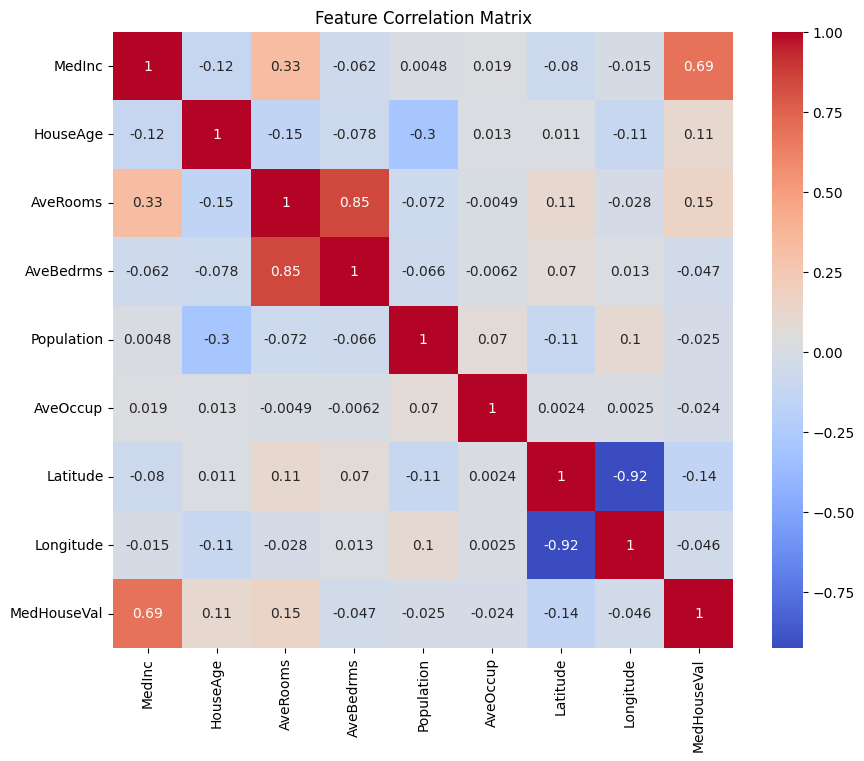

In [5]:
# ----------------------------
# 📌 FEATURE SELECTION
# ----------------------------
# Check correlation with target
corr_matrix = housing_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [6]:
# ----------------------------
# 📌 SPLIT DATA
# ----------------------------
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# ----------------------------
# 📌 TRAIN MODELS
# ----------------------------
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# ----------------------------
# 📌 EVALUATE MODELS
# ----------------------------
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Evaluation:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"R² Score: {r2:.3f}")
    
    # Plot actual vs predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{name}: Actual vs Predicted Prices")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()


Linear Regression Evaluation:
RMSE: 0.746
MAE: 0.533
R² Score: 0.576


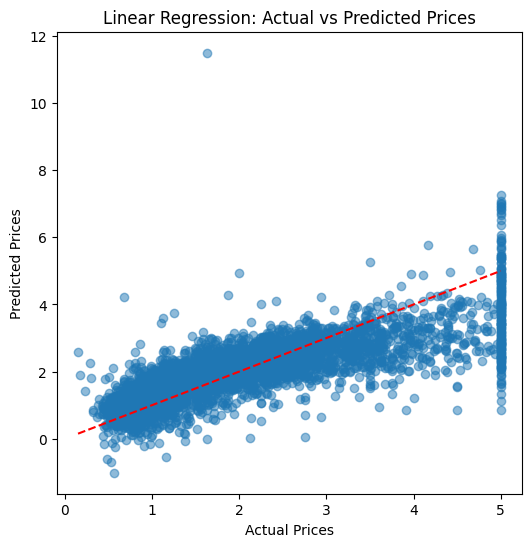


Decision Tree Regressor Evaluation:
RMSE: 0.704
MAE: 0.455
R² Score: 0.622


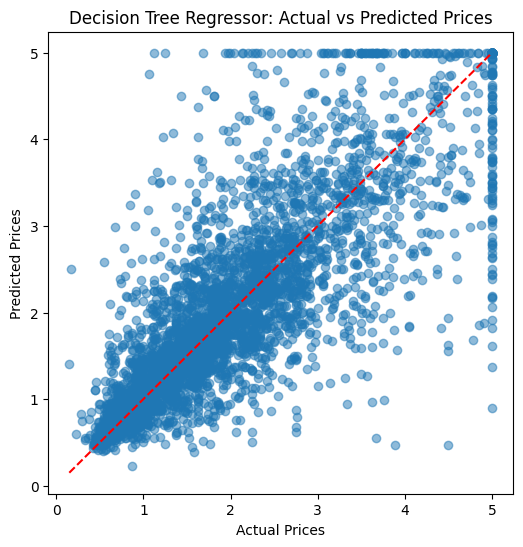


Random Forest Regressor Evaluation:
RMSE: 0.505
MAE: 0.328
R² Score: 0.805


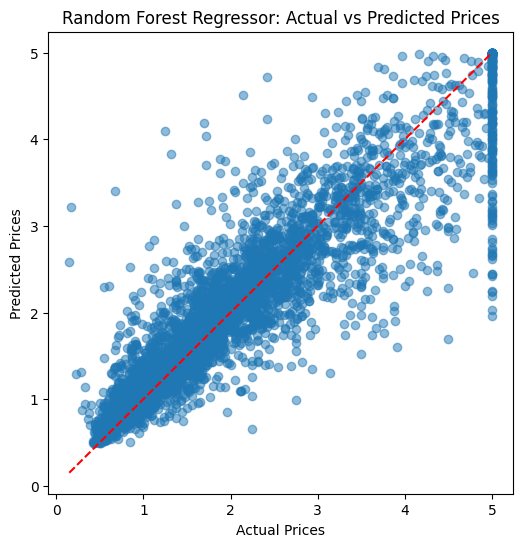

In [16]:
# Evaluate all models
evaluate_model("Linear Regression", lin_reg, X_test, y_test)
evaluate_model("Decision Tree Regressor", dt_reg, X_test, y_test)
evaluate_model("Random Forest Regressor", rf_reg, X_test, y_test)

In [17]:
# ----------------------------
# CONCLUSION
# ----------------------------
print("\nConclusion:")
print("We compared Linear Regression, Decision Tree, and Random Forest models.")
print("Random Forest typically provides the best performance for this dataset.")


Conclusion:
We compared Linear Regression, Decision Tree, and Random Forest models.
Random Forest typically provides the best performance for this dataset.
